In [42]:
import pandas as pd
import re

In [100]:
import os
 
# Function to Get the current
# working directory
def current_path():
    print("Current working directory before")
    print(os.getcwd())
    print()
current_path()
os.chdir('D:\Binar\Platinum')
current_path()

Current working directory before
D:\Binar

Current working directory before
D:\Binar\Platinum



In [44]:
df = pd.read_fwf("D:/Binar/Platinum/train_preprocess.txt", header = None)
df_coba = df[0].tolist()
df_str = str(df_coba)
df_sp = df_str.split()

In [45]:
df0 = df.loc[:,[0]]

In [46]:
def cari(text):
    hasil = re.findall("\t[a-zA-Z]*", text)
    return hasil

In [47]:
df0["label"] =pd.DataFrame(map(cari, df_coba))

In [48]:
def tanda(label):
    if label == "\tpositive":
        sub = "positive"
    elif label == "\tneutral":
        sub = "neutral"
    else:
        sub = "negative"
    return sub

In [49]:
df_label = df0["label"].tolist()
df0["label"] = pd.DataFrame(map(tanda, df_label))
df0

,0,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa\tpositive,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi\tn...,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [50]:
df0.rename(columns = {0:"tulisan"}, inplace = True)
df0

,tulisan,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa\tpositive,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi\tn...,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [52]:
real = df0["tulisan"]

In [53]:
#lowering
def cleansing(text):
    text = text.lower()
    text = re.sub('\t[a-zA-Z]*',' ', text)
    text = re.sub('[^a-zA-Z0-9]',' ', text)
    text = re.sub('x[a-z0-9]{1,2}',' ', text)
    text = re.sub('\s+',' ', text)
    return text
ltext = real.apply(cleansing)
ltext

0        warung ini dimiliki oleh pengusaha pabrik tahu...
1        mohon ulama lurus dan k212 mmbri hujjah partai...
2        lokasi strategis di jalan sumatera bandung tem...
3        betapa bahagia nya diri ini saat unbo g paket ...
4        duh jadi mahasiswa jangan sombong dong kasih k...
                               ...                        
10995                                        tidak kecewa 
10996    enak rasa masakan nya apalagi kepiting yang me...
10997         hormati partai partai yang telah berkoalisi 
10998    pagi pagi di tol pasteur sudah macet parah bik...
10999    meskipun sering belanja ke yogya di riau junct...
Name: tulisan, Length: 11000, dtype: object

In [54]:
df = pd.DataFrame(ltext)
df["label"] = df0["label"]
df

,tulisan,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung tem...,positive
3,betapa bahagia nya diri ini saat unbo g paket ...,positive
4,duh jadi mahasiswa jangan sombong dong kasih k...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai partai yang telah berkoalisi,neutral
10998,pagi pagi di tol pasteur sudah macet parah bik...,negative


In [55]:
neg = df.loc[df['label'] == 'negative'].tulisan.tolist()
neu = df.loc[df['label'] == 'neutral'].tulisan.tolist()
pos = df.loc[df['label'] == 'positive'].tulisan.tolist()

neg_label = df.loc[df['label'] == 'negative'].label.tolist()
neu_label = df.loc[df['label'] == 'neutral'].label.tolist()
pos_label = df.loc[df['label'] == 'positive'].label.tolist()

In [56]:
total_data = pos + neu + neg
labels = pos_label + neu_label + neg_label

print("Pos: %s, Neu: %s, Neg: %s" % (len(pos), len(neu), len(neg)))
print("Total data: %s" % len(total_data))

Pos: 6325, Neu: 1148, Neg: 3527
Total data: 11000


In [57]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

max_features = 100000
tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)
tokenizer.fit_on_texts(total_data)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("tokenizer.pickle has created!")

Z = tokenizer.texts_to_sequences(total_data)

vocab_size = len(tokenizer.word_index)
maxlen = max(len(x) for x in Z)

X = pad_sequences(Z)
with open('x_pad_sequences.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("x_pad_sequences.pickle has created!")

tokenizer.pickle has created!
x_pad_sequences.pickle has created!


In [58]:
Y = pd.get_dummies(df['label'])
Y = Y.values

with open('y_labels.pickle', 'wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("y_labels.pickle has created!")

y_labels.pickle has created!


In [59]:
print(Y)

[[0 0 1]
 [0 1 0]
 [0 0 1]
 ...
 [0 1 0]
 [1 0 0]
 [0 0 1]]


In [60]:
from sklearn.model_selection import train_test_split

file = open("x_pad_sequences.pickle",'rb')
X = pickle.load(file)
file.close()

file = open("y_labels.pickle",'rb')
Y = pickle.load(file)
file.close()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [61]:
y_train.shape

(8800, 3)

In [62]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K

In [63]:
embed_dim = 100

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=maxlen))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 77, 100)           10000000  
                                                                 
 conv1d_3 (Conv1D)           (None, 73, 32)            16032     
                                                                 
 conv1d_4 (Conv1D)           (None, 69, 32)            5152      
                                                                 
 conv1d_5 (Conv1D)           (None, 65, 32)            5152      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                      

In [64]:
from sklearn import metrics

predictions = model.predict(X_test)
y_pred = predictions
matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

69/69 [==============================] - 1s 8ms/step
Testing selesai
              precision    recall  f1-score   support

           0       0.32      0.11      0.16       703
           1       0.00      0.00      0.00       239
           2       0.57      0.89      0.70      1258

    accuracy                           0.54      2200
   macro avg       0.30      0.33      0.29      2200
weighted avg       0.43      0.54      0.45      2200



C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

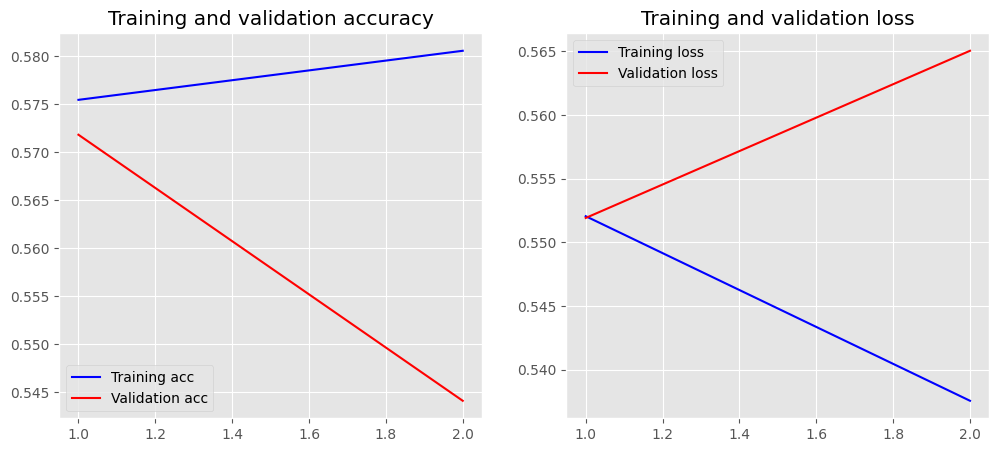

In [65]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

In [101]:
model.save('modelcnn.h5')
print("Model has created!")

Model has created!


In [96]:
df_test = pd.read_csv("D:/Binar/Platinum/data.csv", encoding = "latin-1")
df_test = df_test["Tweet"]
df_test = df_test.apply(cleansing)
df_test = pd.DataFrame(df_test[0:9])
df_test

,Tweet
0,disaat semua cowok berusaha melacak perhatia...
1,rt user user siapa yang telat ngasih tau elu ...
2,41 kadang aku berfikir kenapa aku tetap perc...
3,user user aku itu aku n nku tau matamu sipit t...
4,user user kaum cebong kapir udah keliatan dong...
5,user ya bani taplak dkk xf0 x9f x98 x84 xf0 x...
6,deklarasi pilkada 2018 aman dan anti hoax warg...
7,gue baru aja kelar re watch aldnoah zero pa...
8,nah admin belanja satu lagi port terbaik nak m...


In [97]:
import re 
from keras.models import load_model

input_text = """
Rasa syukur, cukup.
"""

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

sentiment = ['negative', 'neutral', 'positive']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('modelcnn1.h5')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])

print("Text: ",text[0])
print("Sentiment: ",sentiment[polarity])

1/1 [==============================] - 0s 108ms/step
Text:   rasa syukur  cukup  
Sentiment:  positive


In [98]:
X_test = df_test
def predictFile_CNN(X_test):
    Y_predict = []
    for index, row in X_test.iterrows():
        sequences_X_test = tokenizer.texts_to_sequences([row["Tweet"]])
        X_test_1 = pad_sequences(sequences_X_test, maxlen=X.shape[1])
        X_test_1 = np.reshape(X_test_1, (1,X.shape[1]))
        result = model.predict(X_test_1)[0]
        print(result)
        if(np.argmax(result) == 0):
            Y_predict.append("neutral")
        elif (np.argmax(result) == 1):
            Y_predict.append("positive")
        elif (np.argmax(result) == 2):
            Y_predict.append("negative")
    return Y_predict

In [99]:
df_test["label"] = predictFile_CNN(X_test)
df_test

1/1 [==============================] - 0s 22ms/step
[0.21023907 0.03542566 0.7543353 ]
1/1 [==============================] - 0s 26ms/step
[0.48499727 0.06265683 0.45234585]
1/1 [==============================] - 0s 23ms/step
[0.05462397 0.00893817 0.9364379 ]
1/1 [==============================] - 0s 23ms/step
[0.21901406 0.04016865 0.74081725]
1/1 [==============================] - 0s 22ms/step
[0.15283127 0.03233982 0.8148289 ]
1/1 [==============================] - 0s 23ms/step
[0.34178516 0.06894618 0.5892686 ]
1/1 [==============================] - 0s 23ms/step
[0.3724602  0.05702346 0.57051635]
1/1 [==============================] - 0s 22ms/step
[0.2078723  0.045371   0.74675673]
1/1 [==============================] - 0s 22ms/step
[0.22007692 0.02840852 0.7515145 ]


,Tweet,label
0,disaat semua cowok berusaha melacak perhatia...,negative
1,rt user user siapa yang telat ngasih tau elu ...,neutral
2,41 kadang aku berfikir kenapa aku tetap perc...,negative
3,user user aku itu aku n nku tau matamu sipit t...,negative
4,user user kaum cebong kapir udah keliatan dong...,negative
5,user ya bani taplak dkk xf0 x9f x98 x84 xf0 x...,negative
6,deklarasi pilkada 2018 aman dan anti hoax warg...,negative
7,gue baru aja kelar re watch aldnoah zero pa...,negative
8,nah admin belanja satu lagi port terbaik nak m...,negative
